Import Dependencies & Modules

In [1]:
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import config

from src.model_training import (
    prepare_features_targets,
    train_and_tune_rf,
    evaluate_model,
    plot_results
)

sns.set(style="whitegrid")

Load Training & Test Data

In [ ]:
train_csv = config.TRAIN_DATA_CSV
test_csv = config.TEST_DATA_CSV

train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

print("Training data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Training data shape: (235, 6)
Test data shape: (59, 6)


Prepare Features and Targets

In [3]:
X_train, X_test, y_train, y_test = prepare_features_targets(train_df, test_df)
print("Features prepared:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

INFO: X_train shape: (235, 1026), X_test shape: (59, 1026)


Features prepared:
X_train shape: (235, 1026)
X_test shape: (59, 1026)


Train the Model

In [ ]:
best_model = train_and_tune_rf(X_train, y_train)
print("Model trained")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, max_depth=78, max_features=0.3007, min_samples_split=2, n_estimators=134; total time=   0.2s
[CV] END bootstrap=True, max_depth=78, max_features=0.3007, min_samples_split=2, n_estimators=134; total time=   0.2s
[CV] END bootstrap=True, max_depth=78, max_features=0.3007, min_samples_split=2, n_estimators=134; total time=   0.2s
[CV] END bootstrap=True, max_depth=78, max_features=0.3007, min_samples_split=2, n_estimators=134; total time=   0.2s
[CV] END bootstrap=True, max_depth=78, max_features=0.3007, min_samples_split=2, n_estimators=134; total time=   0.2s


INFO: Best parameters: {'bootstrap': True, 'max_depth': 78, 'max_features': 0.3007, 'min_samples_split': 2, 'n_estimators': 134}


Model trained


Evaluate the Model

In [5]:
y_pred, mse, r2 = evaluate_model(best_model, X_test, y_test)
print("Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

INFO: Test MSE: 1987.8355
INFO: Test R^2: 0.7930


Evaluation Metrics:
Mean Squared Error (MSE): 1987.8355408658117
R^2 Score: 0.7929872461697348


Visualize the Results

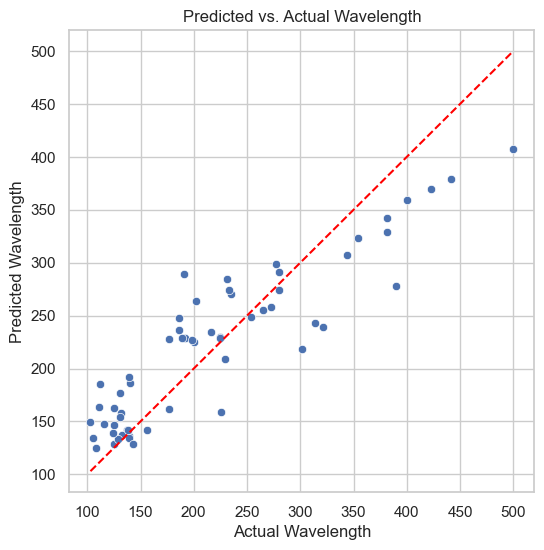

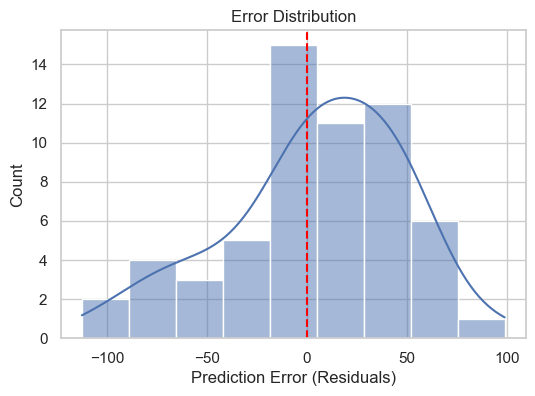

In [6]:
plot_results(y_test, y_pred)